In [7]:
import json
import re

import csv, sys
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from konlpy.tag import Okt
okt = Okt()

In [8]:
openFileName = '전자담배 증상_naver_news_761.json'
    
f = open(openFileName, 'r', encoding='utf-8').read()

jsonData = json.loads(f)
result = ''

for item in jsonData:
    if 'description' in item.keys():
        result = result + re.sub(r'[^\w]', ' ', item['description']) + ' '

# f.close()

In [9]:
def tokenizer(raw, pos=["Noun"], stopword=[]): # 다른 품사 추가 원할 시 pos=["Noun", "Josa", ...]
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

data = tokenizer(result)

In [10]:
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [11]:
print(X)

  (0, 1391)	1
  (1, 397)	1
  (2, 27)	1
  (3, 1725)	1
  (4, 763)	1
  (5, 820)	1
  (6, 2125)	1
  (7, 883)	1
  (8, 2124)	1
  (9, 883)	1
  (10, 1709)	1
  (11, 1741)	1
  (12, 883)	1
  (13, 1913)	1
  (14, 1575)	1
  (15, 554)	1
  (16, 267)	1
  (17, 124)	1
  (18, 898)	1
  (19, 1203)	1
  (20, 1926)	1
  (21, 431)	1
  (22, 681)	1
  (23, 427)	1
  (24, 2181)	1
  :	:
  (14932, 849)	1
  (14933, 1735)	1
  (14934, 838)	1
  (14935, 267)	1
  (14936, 641)	1
  (14937, 2172)	1
  (14938, 854)	1
  (14939, 84)	1
  (14940, 1728)	1
  (14941, 1333)	1
  (14942, 838)	1
  (14943, 265)	1
  (14944, 1725)	1
  (14945, 253)	1
  (14946, 267)	1
  (14947, 756)	1
  (14948, 1299)	1
  (14949, 460)	1
  (14950, 1775)	1
  (14951, 193)	1
  (14952, 1791)	1
  (14953, 1441)	1
  (14954, 1481)	1
  (14955, 267)	1
  (14956, 887)	1


In [12]:
print(vectorize.vocabulary_)

{'의학': 1391, '다섯': 397, '가지': 27, '증상': 1725, '복부': 763, '비만': 820, '혈압': 2125, '상승': 883, '혈당': 2124, '중성': 1709, '지방': 1741, '콜레스테롤': 1913, '전자담배': 1575, '마치': 554, '금연': 267, '경향': 124, '생각': 898, '업체': 1203, '타르': 1926, '당화': 431, '반응': 681, '당뇨병': 427, '환자': 2181, '정상인': 1609, '다음': 401, '여러': 1209, '질병': 1770, '유발': 1347, '요즈음': 1293, '젊은이': 1587, '사용': 850, '포름알데히드': 2001, '장기간': 1531, '라이트': 523, '이드': 1397, '판매': 1974, '중단': 1707, '발표': 693, '권용욱': 231, '기자': 292, '왕좌': 1282, '게임': 97, '최종': 1851, '시즌': 1050, '매체': 578, '세계': 945, '진행': 1767, '중인': 1715, '마약': 548, '중독': 1708, '개선': 67, '임상시험': 1486, '중국': 1705, '시행': 1054, '초기': 1828, '과민': 170, '집중': 1775, '이용자': 1420, '증세': 1726, '구진': 212, '설명': 929, '실험': 1089, '경찰': 122, '대마': 437, '압수': 1158, '공급': 151, '이모': 1401, '수백': 983, '마이크로': 550, '그램': 250, '환각': 2176, '이씨': 1415, '통해': 1953, '대마초': 438, '기분': 287, '긴장': 301, '식욕': 1060, '증가': 1720, '중심': 1712, '카트리지': 1896, '초콜릿': 1837, '젤리': 1653, '형태': 2136, '마류': 545, '제품':

In [13]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(vectorize.fit_transform(data)).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'의학': 13,
 '다섯': 1,
 '가지': 18,
 '증상': 830,
 '복부': 1,
 '비만': 2,
 '혈압': 4,
 '상승': 5,
 '혈당': 2,
 '중성': 1,
 '지방': 1,
 '콜레스테롤': 1,
 '전자담배': 909,
 '마치': 4,
 '금연': 445,
 '경향': 4,
 '생각': 21,
 '업체': 14,
 '타르': 9,
 '당화': 1,
 '반응': 14,
 '당뇨병': 4,
 '환자': 22,
 '정상인': 1,
 '다음': 8,
 '여러': 9,
 '질병': 16,
 '유발': 54,
 '요즈음': 2,
 '젊은이': 1,
 '사용': 198,
 '포름알데히드': 43,
 '장기간': 4,
 '라이트': 1,
 '이드': 1,
 '판매': 23,
 '중단': 16,
 '발표': 11,
 '권용욱': 1,
 '기자': 26,
 '왕좌': 1,
 '게임': 2,
 '최종': 1,
 '시즌': 2,
 '매체': 1,
 '세계': 14,
 '진행': 19,
 '중인': 8,
 '마약': 9,
 '중독': 122,
 '개선': 2,
 '임상시험': 4,
 '중국': 5,
 '시행': 9,
 '초기': 28,
 '과민': 5,
 '집중': 13,
 '이용자': 6,
 '증세': 9,
 '구진': 3,
 '설명': 17,
 '실험': 6,
 '경찰': 14,
 '대마': 6,
 '압수': 1,
 '공급': 24,
 '이모': 2,
 '수백': 1,
 '마이크로': 2,
 '그램': 2,
 '환각': 2,
 '이씨': 1,
 '통해': 33,
 '대마초': 3,
 '기분': 10,
 '긴장': 2,
 '식욕': 5,
 '증가': 45,
 '중심': 4,
 '카트리지': 25,
 '초콜릿': 1,
 '젤리': 1,
 '형태': 14,
 '마류': 1,
 '제품': 95,
 '대해': 17,
 '검사': 6,
 '미국': 21,
 '식품': 7,
 '약국': 8,
 '흡연': 271,
 '발작': 42,
 '연관': 21,
 '조

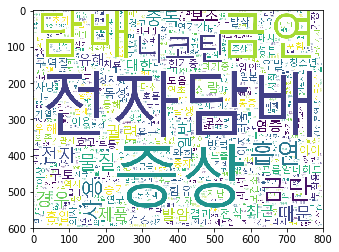

In [17]:
from wordcloud import WordCloud

w=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
# plt.axis(&quot;off&quot;)
plt.show()

In [18]:
vectorizeT = TfidfVectorizer()

Y = vectorizeT.fit_transform(data)

print(vectorize.vocabulary_) # 단어집의 콘텐츠를 나타낸다. value값은 인덱스를 나타낸다.
print(Y.toarray()) # 단어집에 있는 단어들의 각각의 카운트 갯수를 나타낸다.

{'의학': 1391, '다섯': 397, '가지': 27, '증상': 1725, '복부': 763, '비만': 820, '혈압': 2125, '상승': 883, '혈당': 2124, '중성': 1709, '지방': 1741, '콜레스테롤': 1913, '전자담배': 1575, '마치': 554, '금연': 267, '경향': 124, '생각': 898, '업체': 1203, '타르': 1926, '당화': 431, '반응': 681, '당뇨병': 427, '환자': 2181, '정상인': 1609, '다음': 401, '여러': 1209, '질병': 1770, '유발': 1347, '요즈음': 1293, '젊은이': 1587, '사용': 850, '포름알데히드': 2001, '장기간': 1531, '라이트': 523, '이드': 1397, '판매': 1974, '중단': 1707, '발표': 693, '권용욱': 231, '기자': 292, '왕좌': 1282, '게임': 97, '최종': 1851, '시즌': 1050, '매체': 578, '세계': 945, '진행': 1767, '중인': 1715, '마약': 548, '중독': 1708, '개선': 67, '임상시험': 1486, '중국': 1705, '시행': 1054, '초기': 1828, '과민': 170, '집중': 1775, '이용자': 1420, '증세': 1726, '구진': 212, '설명': 929, '실험': 1089, '경찰': 122, '대마': 437, '압수': 1158, '공급': 151, '이모': 1401, '수백': 983, '마이크로': 550, '그램': 250, '환각': 2176, '이씨': 1415, '통해': 1953, '대마초': 438, '기분': 287, '긴장': 301, '식욕': 1060, '증가': 1720, '중심': 1712, '카트리지': 1896, '초콜릿': 1837, '젤리': 1653, '형태': 2136, '마류': 545, '제품':

In [19]:
import operator

freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, idx in vectorizeT.vocabulary_.items()]
dict_result = dict(freqs_TFIDF)

# value(단어별 빈도수)를 기준으로 내림차순 정렬
# sort_result : 튜플을 항목으로 갖는 정렬된 리스트
sort_result = sorted(dict_result.items(), reverse=True, key=operator.itemgetter(1))

for k in sort_result :
    print(k)

('전자담배', 909.0)
('증상', 830.0)
('담배', 446.0)
('금연', 445.0)
('니코틴', 402.0)
('금단', 279.0)
('흡연', 271.0)
('사용', 198.0)
('물질', 148.0)
('경우', 128.0)
('전자', 127.0)
('때문', 123.0)
('중독', 122.0)
('궐련', 110.0)
('제품', 95.0)
('최근', 82.0)
('일반', 80.0)
('발암', 79.0)
('보조', 77.0)
('염증', 75.0)
('대한', 74.0)
('관련', 71.0)
('유해', 67.0)
('구토', 65.0)
('사람', 62.0)
('흡입', 57.0)
('건강', 55.0)
('효과', 55.0)
('유발', 54.0)
('천식', 54.0)
('함유', 54.0)
('독성', 53.0)
('발생', 51.0)
('결과', 50.0)
('위해', 50.0)
('구역질', 50.0)
('어지러움', 49.0)
('욕구', 47.0)
('방법', 46.0)
('완화', 46.0)
('가래', 46.0)
('증가', 45.0)
('아이', 44.0)
('포름알데히드', 43.0)
('사망', 43.0)
('현기증', 43.0)
('이용', 43.0)
('발작', 42.0)
('도움', 42.0)
('원인', 40.0)
('성분', 40.0)
('청소년', 38.0)
('통증', 38.0)
('코스', 37.0)
('시작', 37.0)
('대신', 37.0)
('이상', 37.0)
('연초', 37.0)
('연기', 36.0)
('의사', 35.0)
('통해', 33.0)
('부작용', 32.0)
('두통', 32.0)
('폐기종', 32.0)
('가장', 31.0)
('경고', 31.0)
('치료', 30.0)
('역시', 30.0)
('연구', 30.0)
('노출', 30.0)
('지난', 29.0)
('가열', 29.0)
('의존', 29.0)
('초기', 28.0)
('포함', 27.

('위생', 2.0)
('질문', 2.0)
('리서치', 2.0)
('페이퍼', 2.0)
('김영', 2.0)
('파스', 2.0)
('이내', 2.0)
('두툼', 2.0)
('수면장애', 2.0)
('타격', 2.0)
('눈길', 2.0)
('헤로인', 2.0)
('가입', 2.0)
('종합', 2.0)
('화제', 2.0)
('오늘', 2.0)
('충혈', 2.0)
('시야', 2.0)
('물감', 2.0)
('안약', 2.0)
('크기', 2.0)
('특성', 2.0)
('기대', 2.0)
('부종', 2.0)
('피츠버그', 2.0)
('근거', 2.0)
('단순', 2.0)
('대체로', 2.0)
('뉴욕', 2.0)
('어린이', 2.0)
('혼동', 2.0)
('수년', 2.0)
('전망', 2.0)
('변화', 2.0)
('비판', 2.0)
('청력', 2.0)
('영유', 2.0)
('니켈', 2.0)
('아래층', 2.0)
('탈모', 2.0)
('아사카', 2.0)
('스즈키', 2.0)
('화가', 2.0)
('수리', 2.0)
('기계', 2.0)
('정말', 2.0)
('예전', 2.0)
('지난달', 2.0)
('점차', 2.0)
('스마트폰', 2.0)
('제공', 2.0)
('주사기', 2.0)
('프로그램', 2.0)
('평가', 2.0)
('만약', 2.0)
('단번', 2.0)
('지름길', 2.0)
('주지', 2.0)
('소화', 2.0)
('실천', 2.0)
('세금', 2.0)
('친구', 2.0)
('선제', 2.0)
('조치', 2.0)
('비중', 2.0)
('머리', 2.0)
('중이', 2.0)
('별로', 2.0)
('행사', 2.0)
('자리', 2.0)
('더욱', 2.0)
('부모', 2.0)
('돌연사', 2.0)
('이외', 2.0)
('가정', 2.0)
('그것', 2.0)
('예외', 2.0)
('노트', 2.0)
('반려동물', 2.0)
('판코', 2.0)
('추천', 2.0)
('인하',

('레벨', 1.0)
('변형', 1.0)
('약제', 1.0)
('항우울제', 1.0)
('제제', 1.0)
('일단', 1.0)
('첫걸음', 1.0)
('문전', 1.0)
('아침', 1.0)
('기상', 1.0)
('포만', 1.0)
('소스', 1.0)
('만들기', 1.0)
('이비인후과', 1.0)
('귀지', 1.0)
('김성은', 1.0)
('최윤영', 1.0)
('카니발', 1.0)
('인승', 1.0)
('속도', 1.0)
('아이튠즈', 1.0)
('동기화', 1.0)
('비트', 1.0)
('노래', 1.0)
('쌈디', 1.0)
('군대', 1.0)
('백업', 1.0)
('윈도우', 1.0)
('테두리', 1.0)
('상대방', 1.0)
('신형', 1.0)
('군복', 1.0)
('정씨', 1.0)
('초반', 1.0)
('대학생', 1.0)
('박모', 1.0)
('애연', 1.0)
('함부로', 1.0)
('중소', 1.0)
('주로', 1.0)
('은단', 1.0)
('골드', 1.0)
('캔디', 1.0)
('솔잎', 1.0)
('도우', 1.0)
('갑론', 1.0)
('초콜렛', 1.0)
('군것질', 1.0)
('용해', 1.0)
('생기지', 1.0)
('개발자', 1.0)
('모드', 1.0)
('메모', 1.0)
('시립', 1.0)
('미술관', 1.0)
('주차장', 1.0)
('호수', 1.0)
('포켓몬스터', 1.0)
('레드', 1.0)
('군무원', 1.0)
('피시방', 1.0)
('알바', 1.0)
('면접', 1.0)
('구안', 1.0)
('시나', 1.0)
('마저', 1.0)
('거세', 1.0)
('오후', 1.0)
('커피', 1.0)
('글라이콜', 1.0)
('휴식시간', 1.0)
('원칙', 1.0)
('일전', 1.0)
('진찰', 1.0)
('말씀', 1.0)
('음식점', 1.0)
('행위', 1.0)
('도리', 1.0)
('체용', 1.0)
('포름알데하이드', 1.0)
(

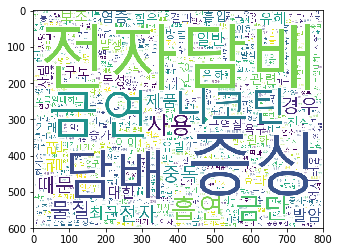

In [20]:
w1=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs_TFIDF))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(w1)
plt.show()